Column names in the dataset:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Missing values count:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Number of duplicate entries: 0


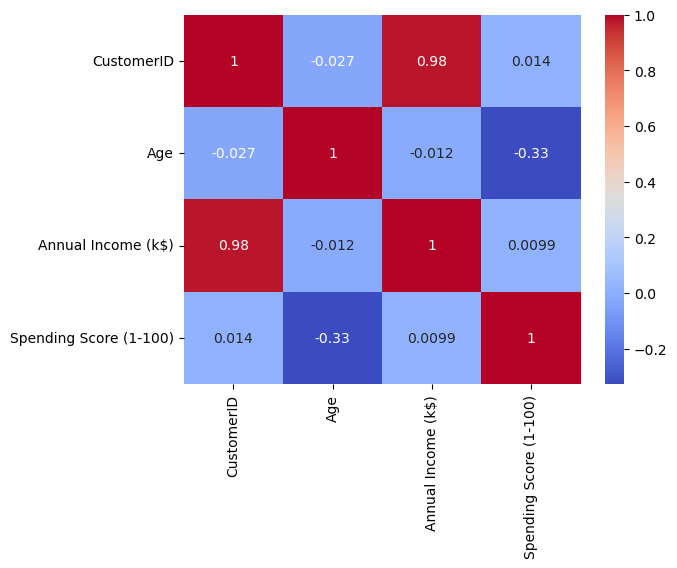

C:\Users\deon.archary\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


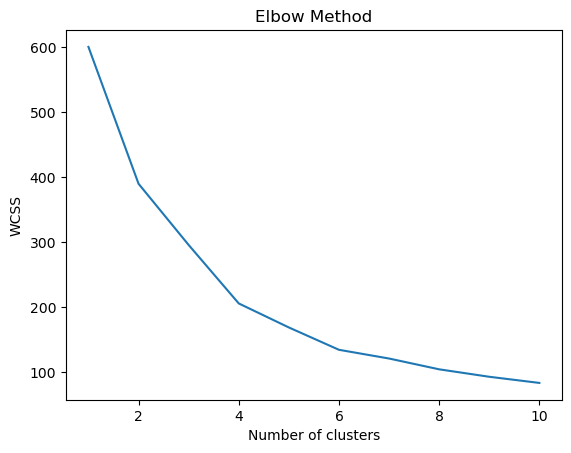

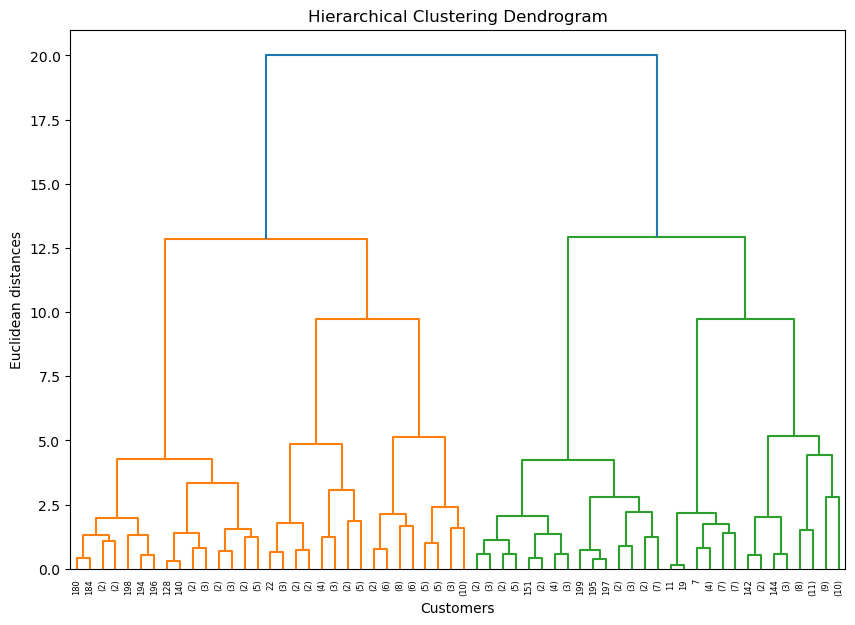

                      Age  Annual Income (k$)  Spending Score (1-100)
kmeans_cluster                                                       
0               55.638298           54.382979               48.851064
1               32.875000           86.100000               81.525000
2               25.185185           41.092593               62.240741
3               46.250000           26.750000               18.350000
4               39.871795           86.102564               19.358974
                            Age  Annual Income (k$)  Spending Score (1-100)
hierarchical_cluster                                                       
0                     26.560606           47.363636               56.787879
1                     56.400000           55.288889               48.355556
2                     32.692308           86.538462               82.128205
3                     43.892857           91.285714               16.678571
4                     44.318182           25.772727   

In [18]:
# M5W3:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



# load the dataset:
file_name = "Mall_Customers.csv"
data = pd.read_csv(file_name)
data.head()



# QUESTION 1: Clean the data, perform exploratory analysis and then normalise the data:

# Column names:
column_names = data.columns


# Print column names:
print("Column names in the dataset:")
print(column_names)


# Check info about the dataset, and the data types of each column:
print(data.info())


# Check for missing values in the dataset:
print("Missing values count:")
print(data.isnull().sum())

# Check for duplicates:
print("Number of duplicate entries:", data.duplicated().sum())

# Check for correlation between numeric features:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# Normalize the data using StandardScaler:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[num_cols] = scaler.fit_transform(data[num_cols])




# QUESTION 2: Perform clustering of the data using K-means and/or hierarchical clustering:

# Find the optimal number of clusters using the elbow method:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_scaled[num_cols])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# Apply K-means clustering:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(data_scaled[num_cols])


# Hierarchical clustering :
linked = linkage(data_scaled[num_cols], 'ward')


# Visualize the dendrogram:
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Apply Agglomerative Clustering:
agg_clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
data['hierarchical_cluster'] = agg_clustering.fit_predict(data_scaled[num_cols])




# QUESTION 3: How many clusters are there in the data and why?:

# Based on the K-means clustering and the hierarchical clustering, it seems that the optimal number of 
# clusters is 5. The elbow method shows a reduction in WCSS up to 5 clusters, after that the reduction 
# becomes less significant. The dendrogram also shows 5 major clusters when we cut the tree at a good 
# height.




# QUESTION 4: Translate the clusters into business insight. What advice would 
# you give the mall owner, so that they can design a marketing strategy using your insights:


# To translate the clusters into business insights, we can analyze each cluster's characteristics and 
# provide recommendations:

# Analyze each cluster's characteristics
# K Means
cluster_analysis = data.groupby('kmeans_cluster')[num_cols].mean()
print(cluster_analysis)

# Hierarchial
cluster_analysis_hierarchical = data.groupby('hierarchical_cluster')[num_cols].mean()
print(cluster_analysis_hierarchical)


# We can compare the insights from both K-means and hierarchical clustering to get a good understanding of 
# customer segments. The insights and recommendations for each cluster are as follows:

# Cluster 0 (K-means) / Cluster 1 (Hierarchical): Older customers with moderate annual income and a 
# moderately low spending score. This cluster may value convenience and comfort more than discounts. 
# The mall can focus on creating a comfortable shopping experience, offering products that relate to their 
# interests, and providing good customer service.

# Cluster 1 (K-means) / Cluster 2 (Hierarchical): Middle-aged customers with high annual income and a high 
# spending score. This cluster have high purchasing power and are probably interested in quality 
# products and services. The mall can target this cluster with loyalty programs, personalized promotions, 
# and marketing campaigns for premium products and services.

# Cluster 2 (K-means) / Cluster 0 (Hierarchical): Younger customers with low to moderate annual income and 
# a moderately high spending score. This cluster may be interested in trendy and fashionable products. 
# The mall could attract them through advertising, sales, and popular brands.

# Cluster 3 (K-means) / Cluster 4 (Hierarchical): Middle-aged customers with low annual income and a low 
# spending score. This cluster may be price-sensitive and would respond well to discounts, deals, or 
# offers on a wide range of products. The mall could attract them through advertising, discounts, or 
# special offers.

# Cluster 4 (K-means) / Cluster 3 (Hierarchical): Middle-aged customers with very high annual income and a 
# low spending score. This cluster represents high-income customers who are not spending much at the mall. 
# The mall needs to understand the preferences and needs of these customers, offering exclusive 
# experiences, and providing dedicated customer service to encourage them to spend more.

# By using the insights from both K-means and hierarchical clustering, the mall owner can design 
# marketing strategies for each cluster's preferences, maximizing customer satisfaction and revenue.
